# IMPORT DATASET

In [1]:
import pandas as pd

In [2]:
A = pd.read_csv("E:/Mall_Customers.csv")

# DATA PROFILING

In [3]:
A.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
A.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
A.shape

(200, 5)

# DATA PRE-PROCESSING

In [7]:
A.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


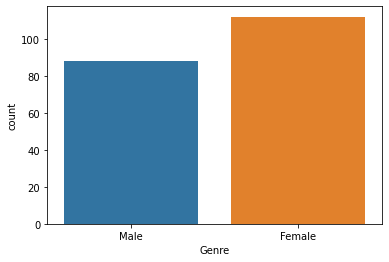

In [9]:
sb.countplot(A.Genre)#Distribution of Gender in a mall
plt.show()

In [10]:
# A["Genre"].value_counts().plot(kind = "pie")#Females have more contribution than man

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

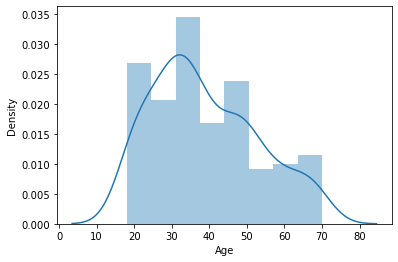

In [11]:
sb.distplot(A["Age"])#Ages from 20 to 40 are more frequent in a mall

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

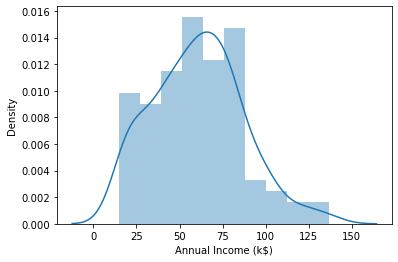

In [12]:
sb.distplot(A["Annual Income (k$)"])

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

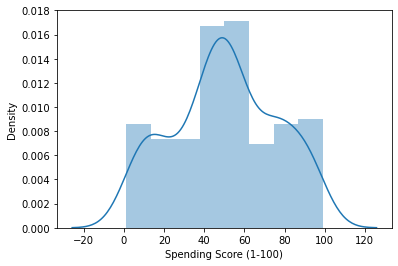

In [13]:
sb.distplot(A["Spending Score (1-100)"] )

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

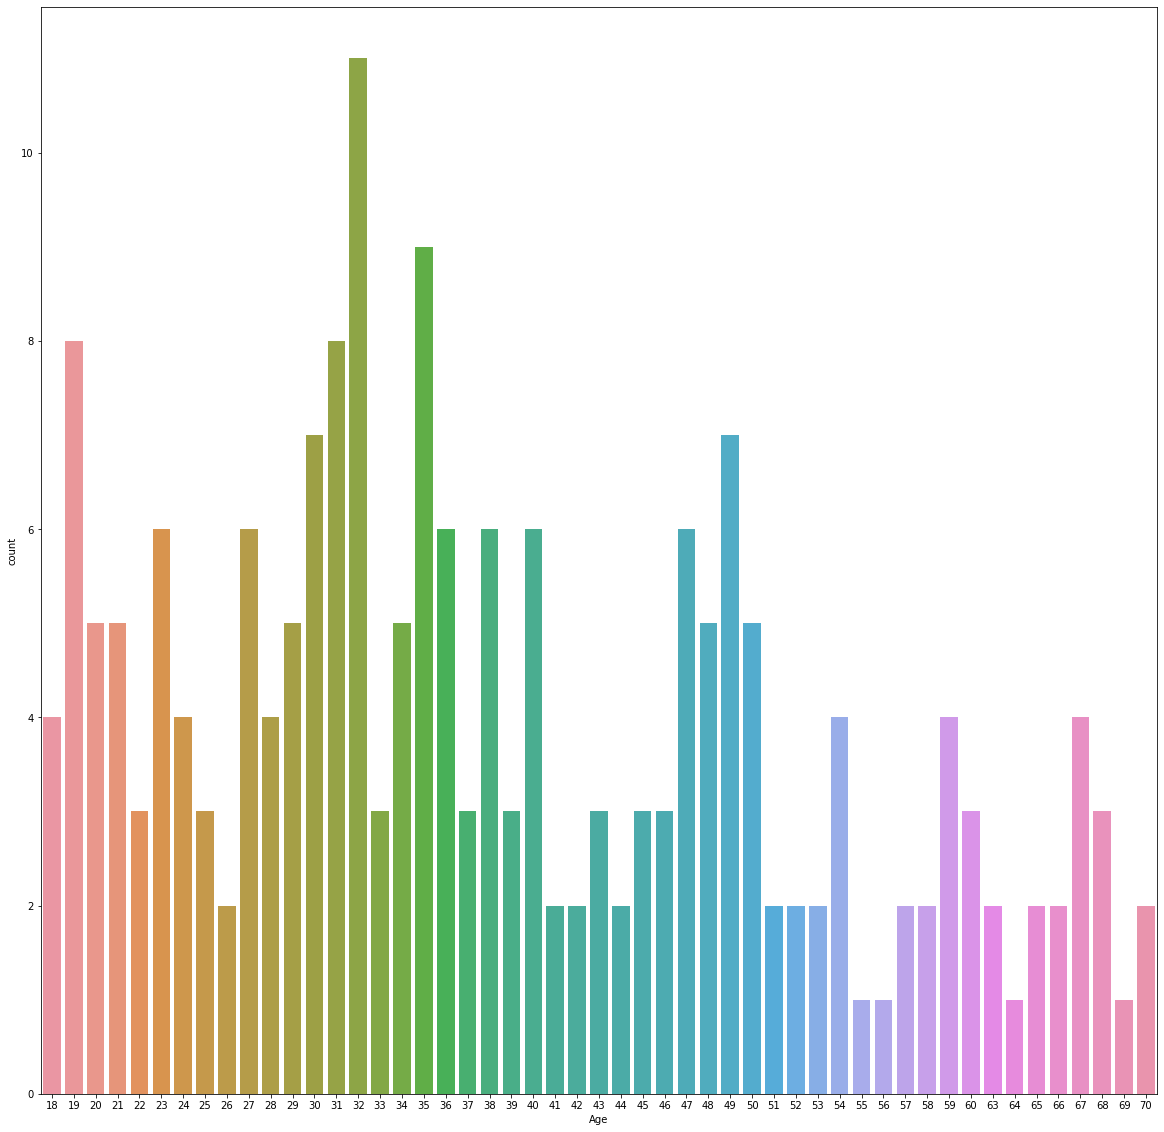

In [14]:
plt.figure(figsize = (20,20))
sb.countplot(A["Age"])#Distribution of ages in mall

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

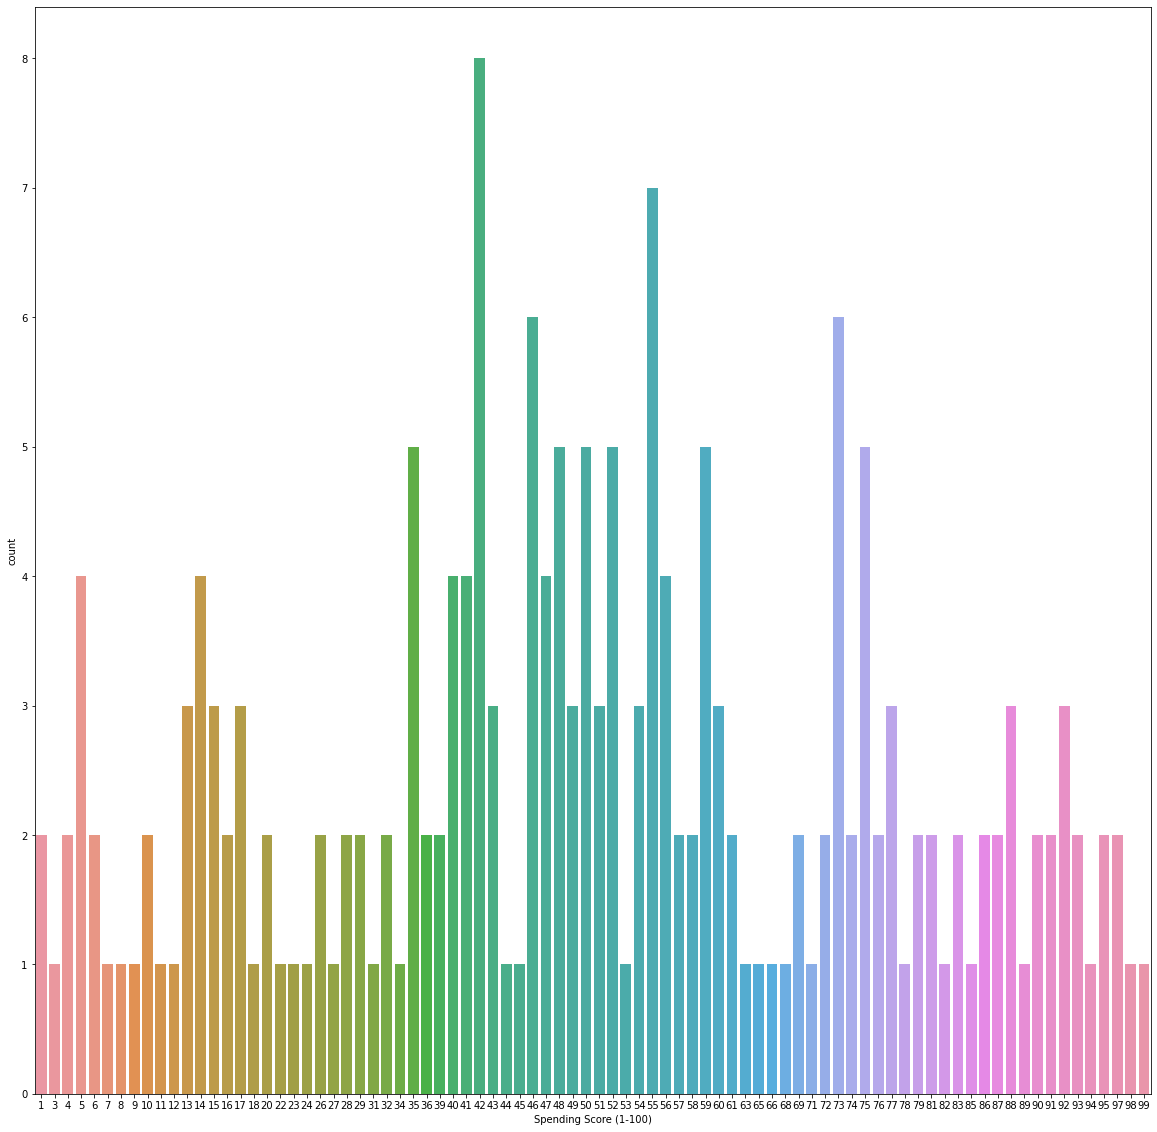

In [15]:
plt.figure(figsize = (20,20))
sb.countplot(A["Spending Score (1-100)"])#Distribution of Spending Score

In [16]:
# K-Means Clustering based on Annual Income (k$)

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
B = A[["Annual Income (k$)","Spending Score (1-100)"]]
k = range(2,10,1)
WCSS = []
for i in k:
    km = KMeans(n_clusters = i)
    model = km.fit(B)
    WCSS.append(model.inertia_)

Text(0.5, 1.0, 'Elbow curve')

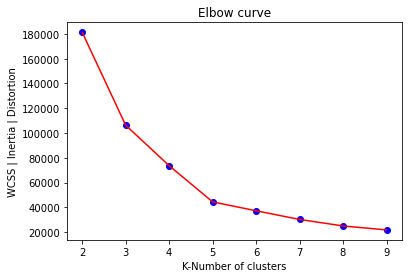

In [19]:
plt.scatter(k,WCSS,c = "blue")
plt.plot(k,WCSS,c = "red")
plt.xlabel("K-Number of clusters")
plt.ylabel("WCSS | Inertia | Distortion")
plt.title("Elbow curve")

<ipython-input-20-20e375e84330>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["cluster"] = model.labels_


Text(0, 0.5, 'Spending Score (1-100)')

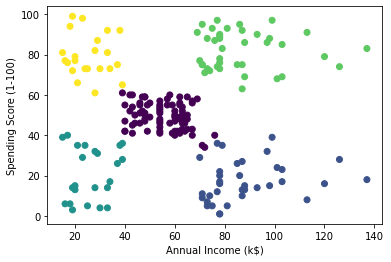

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
model = km.fit(B)
B["cluster"] = model.labels_
plt.scatter(A["Annual Income (k$)"],A["Spending Score (1-100)"],c = B.cluster)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

Based on customer Annual Income and Spending Score which are the best attributes to determine the segments of a customer in a Mall

In [21]:
# K-Means Clustering based on Age (k$)

In [22]:
from sklearn.cluster import KMeans
C = A[["Age","Spending Score (1-100)"]]
k = range(2,10,1)
WCSS = []
for i in k:
    km = KMeans(n_clusters = i)
    model = km.fit(C)
    WCSS.append(model.inertia_)

Text(0.5, 1.0, 'k-Number of clusters')

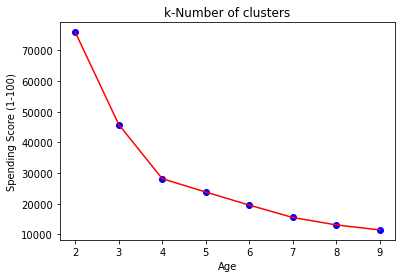

In [23]:
plt.scatter(k,WCSS,c = "blue")
plt.plot(k,WCSS,c = "red")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("k-Number of clusters")

<ipython-input-24-a910f1932adb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C["cluster"] = model.labels_


Text(0, 0.5, 'Spending Score (1-100)')

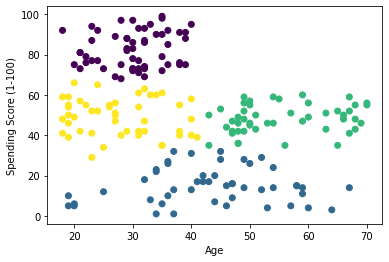

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
model = km.fit(C)
C["cluster"] = model.labels_
plt.scatter(A["Age"],A["Spending Score (1-100)"],c = C.cluster)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

4 different categories are decided Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

# Hierarchical Clustering according to Annual Income

In [25]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = A[["Annual Income (k$)","Spending Score (1-100)"]]
B = pd.DataFrame(ss.fit_transform(B),columns = ["Annual Income (k$)","Spending Score (1-100)"] )

In [26]:
agc = AgglomerativeClustering(n_clusters = 5,linkage = "complete")
model = agc.fit(B)

In [27]:
B["cluster"] = model.labels_

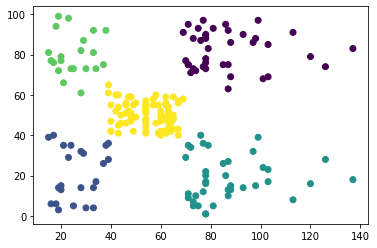

In [28]:
plt.scatter(A["Annual Income (k$)"],A["Spending Score (1-100)"],c = B.cluster)

Based on customer Annual Income and Spending Score which are the best attributes to determine the segments of a customer in a Mall

In [29]:
A["label_for_grouping"] = model.labels_

In [30]:
A

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label_for_grouping
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


# Hierarchical Clustering according to Age

In [31]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = A[["Age","Spending Score (1-100)"]]
C = pd.DataFrame(ss.fit_transform(C),columns = ["Age","Spending Score (1-100)"])

In [32]:
agc = AgglomerativeClustering(n_clusters = 4,linkage = "complete")
model = agc.fit(C)

In [33]:
C["cluster"] = model.labels_

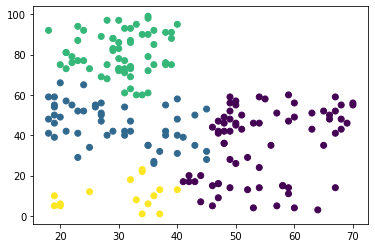

In [34]:
plt.scatter(A["Age"],A["Spending Score (1-100)"],c = C.cluster)

4 different categories are decided Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.